# Aprendizaje supervisado - Classification Model

In [64]:
from google.colab import drive
drive.mount('content/')
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import scatter
import plotly.express as px
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay, classification_report, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
from sklearn.linear_model import LinearRegression

About the Dataset


Pregnancies :- Number of times a woman has been pregnant


Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test


BloodPressure :- Diastollic Blood Pressure (mm hg)


SkinThickness :- Triceps skin fold thickness(mm)


Insulin :- 2 hour serum insulin(mu U/ml)


BMI :- Body Mass Index ((weight in kg/height in m)^2)


Age :- Age(years)


DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)


Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)



---



Embarazos :- Número de veces que una mujer ha estado embarazada

Glucosa :- Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia oral a la glucosa

Presión arterial :- Presión arterial diastólica (mm Hg)

Grosor de la piel :- Grosor del pliegue cutáneo del tríceps (mm)

Insulina :- Insulina sérica a las 2 horas (mu U/ml)

IMC :- Índice de Masa Corporal ((peso en kg/altura en m)^2)

Edad :- Edad (años)

Función de pedigrí de diabetes :- Puntajes de probabilidad de diabetes basados en el historial familiar)

Resultado :- 0 (no tiene diabetes) o 1 (tiene diabetes)

ETL PROCESS

1h

In [2]:
df = pd.read_csv('/content/content/MyDrive/Colab Notebooks/Machine learning/DATASETS/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627,50,1
1,1,85,66,29,0,26.6,351,31,0
2,8,183,64,0,0,23.3,672,32,1
3,1,89,66,23,94,28.1,167,21,0
4,0,137,40,35,168,43.1,"2,288",33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,171,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245,30,0
766,1,126,60,0,0,30.1,349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    object 
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 54.1+ KB


Como las celdas tienen valores tipo 1,233, procedemos a eliminar las comas de los valores y a convertir la columna en float.

In [4]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].apply(lambda x: float(x.replace(',', '')))

In [5]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.00,50,1
1,1,85,66,29,0,26.6,351.00,31,0
2,8,183,64,0,0,23.3,672.00,32,1
3,1,89,66,23,94,28.1,167.00,21,0
4,0,137,40,35,168,43.1,2288.00,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1


In [6]:
df.duplicated().sum()

0

DF sin valores duplicados ni nulos

Todas las columnas aportan valor a nuestro analisis, debido a que son causas o consecuencias de la diabetes.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,428.235091,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,340.485655,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,205.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,337.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,591.500000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


In [8]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Las siguientes columnas: Glucose, BloodPressure,	SkinThickness,	Insulin,	BMI, no deberian de existir datos en 0, porque son parte de los signos vitales del organismo. Asi que, procedemos a hacer imputacion media. No usamos la columna Pregnancies, debido a que es posible cierto numero de mujeres no haya quedado embarazada.

In [9]:
imputer = SimpleImputer(missing_values=0, strategy="mean")

df['BloodPressure'] = imputer.fit_transform(df['BloodPressure'].values.reshape(-1, 1))
df['SkinThickness'] = imputer.fit_transform(df['SkinThickness'].values.reshape(-1, 1))
df['Insulin'] = imputer.fit_transform(df['Insulin'].values.reshape(-1, 1))
df['BMI'] = imputer.fit_transform(df['BMI'].values.reshape(-1, 1))
df['Glucose'] = imputer.fit_transform(df['BMI'].values.reshape(-1, 1))

df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,32.457464,72.405184,29.153420,155.548223,32.457464,428.235091,33.240885,0.348958
std,3.369578,6.875151,12.096346,8.790942,85.021108,6.875151,340.485655,11.760232,0.476951
min,0.000000,18.200000,24.000000,7.000000,14.000000,18.200000,0.100000,21.000000,0.000000
25%,1.000000,27.500000,64.000000,25.000000,121.500000,27.500000,205.000000,24.000000,0.000000
50%,3.000000,32.400000,72.202592,29.153420,155.548223,32.400000,337.000000,29.000000,0.000000
75%,6.000000,36.600000,80.000000,32.000000,155.548223,36.600000,591.500000,41.000000,1.000000
max,17.000000,67.100000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


In [11]:
# Haga visualizaciones de la data incluyendo heatmap para ver la relacion de las caracteristicas del dataset

In [ ]:
sns.scatterplot(data=df, x="Glucose", y="Age", hue="Outcome")
plt.title('Relacion entre la edad y la cantidad de glucosa. Con diabetes vs sin diabetes')
plt.xlabel="Nivel de glucosa"
plt.ylabel="Edad (años)"
plt.show()

Esta relacion muestra que:
1. La mayor concentracion de personas con diabetes esta entre los 25 y 45 mg/dl de glucosa.
2. Entre las edades de los 25 a 60 años.

In [94]:
fig = px.scatter(x=df['Glucose'], y=df['Age'], color=df['Outcome'],
              title='Relacion entre la edad y la cantidad de glucosa. Con diabetes vs sin diabetes')
fig.update_xaxes(title_text="Nivel de glucosa (mg/dl)")
fig.update_yaxes(title_text="Edad (años)")
fig.show()

In [102]:
fig = px.histogram(df, x="Age", color="Outcome",
                  nbins=16, opacity=0.8, barmode="group")
fig.update_layout(
    title="Insidencia en las edades de las personas con diabetes",
    xaxis_title="Edad (años)",
    yaxis_title="Frecuencia")
fig.show()

In [119]:
fig = px.bar(df, x="BloodPressure", orientation="v",
             title="Frecuencia de la presion arterial")
fig.update_layout(
    xaxis_title="Presion Arterial (mm/hg)",
    yaxis_title="Frecuencia")

fig.show()


In [12]:
# Identifique los valores atipicos (Outlier)
# ¿Qué es un valor atípico?
# Un valor atípico es un punto de datos en un conjunto de datos que está distante de todas las demás observaciones.

In [13]:
# Divida la data de prueba y entrenamiento. Continue con los demas paso hasta llegar a las metricas para evaluar el modelo de prediccion

In [128]:
X = df.drop(columns='Outcome')
y = df.Outcome


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [129]:
print("X_train",X_train.shape)
print("X_train", y_train.shape)

X_train (576, 8)
X_train (576,)


In [130]:
# Intanciamos el modelo de clasificacion y se lo signamos a una variable
dtc = DecisionTreeClassifier()

# Instanciamos el metodo StandardScaler para escalar los valores numericos a unidades mas pequeñas
scaler = StandardScaler()

# Creamos un pipeline donde pasaremos la accion que este hara y el modelo de clasificacion al que se le aplicara dicha accion
#  Ej:. make_pipeline(metodo, modelo)

classification_pipe = make_pipeline(scaler, dtc)

# Por ultimo ajustamos el conjunto de datos de entremaniento de X y "y" al pipeline cargado

classification_pipe.fit(X_train, y_train)

# Diagrama de los pasos que seguira y aplicara nuestro pipeline a nuestro conjunto de datos

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [131]:
# Predeciomos los resultado llamando el medoto predict y pasando como parametro el conjunto de prueba X
y_pred = classification_pipe.predict(X_test)

print("Precciones: ",y_pred)

Precciones:  [0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0]


In [132]:
# Medimos nuestros resultados para saber que tan bien se entreno el modelo
# Para esto pasamos como argumento el conjunto de prueba de "y" y la predeccion del paso anterior (Recuerden ponerlo dentro de un print())
print(classification_report(y_test,y_pred))
#  roc_auc_score(self.ytrain, logreg_pipeline.predict_proba(self.xtrain)[:,1]),roc_auc_score(self.ytest, logreg_pipeline.predict_proba(self.xtest)[:,1])

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       123
           1       0.42      0.41      0.41        69

    accuracy                           0.59       192
   macro avg       0.55      0.55      0.55       192
weighted avg       0.58      0.59      0.59       192



In [133]:
# **Precisión (Precision):** Indica la proporción de instancias clasificadas como positivas que realmente son positivas.
# Se calcula como TP / (TP + FP).

TP = lambda x, y, class_true, class_pred: np.sum((x == class_true) & (y == class_pred)) # clase 0: np.sum((y_test == 0) & (y_pred == 0))
FP = lambda x, y, class_true, class_pred: np.sum((x == class_true) & (y == class_pred))
FN =  lambda x, y, class_true, class_pred: np.sum((x == class_true) & (y == class_pred))
TN =  lambda x, y, class_true, class_pred: np.sum((x == class_true) & (y == class_pred))

precision_0 = TP(y_test, y_pred,0,0) / ( TP(y_test, y_pred, 0, 0) + FP(y_test, y_pred,1,0) )
precision_1 = TP(y_test, y_pred,1,1) / (TP(y_test, y_pred,1,1) + FP(y_test, y_pred,0,1))

print("% de Precision clase 0:", np.round(precision_0,2))
print("% de Precision clase 1:", np.round(precision_1,2))


% de Precision clase 0: 0.67
% de Precision clase 1: 0.42


In [134]:
# Recall (Sensibilidad o Tasa de Verdaderos Positivos): Mide la proporción de instancias positivas que fueron correctamente
#  identificadas por el modelo. Se calcula como TP / (TP + FN).

recall_0 =  TP(y_test, y_pred, 0, 0)  / ( TP(y_test, y_pred, 0, 0)  + FN(y_test, y_pred, 0, 1))
recall_1 =  TP(y_test, y_pred, 1, 1)  / ( TP(y_test, y_pred, 1, 1)  + FN(y_test, y_pred, 1, 0))
print("% de recall clase 0:", np.round(recall_0,2))
print("% de recall clase 1:", np.round( recall_1,2))

% de recall clase 0: 0.69
% de recall clase 1: 0.41


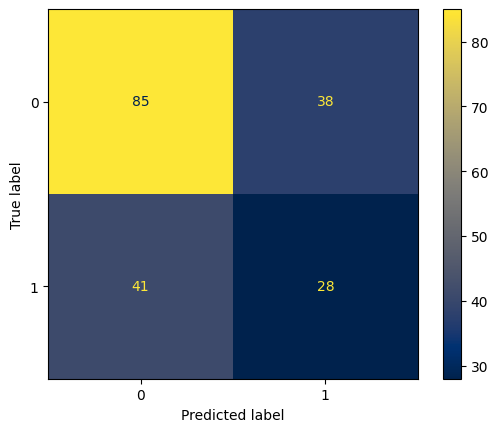

In [136]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap='cividis')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



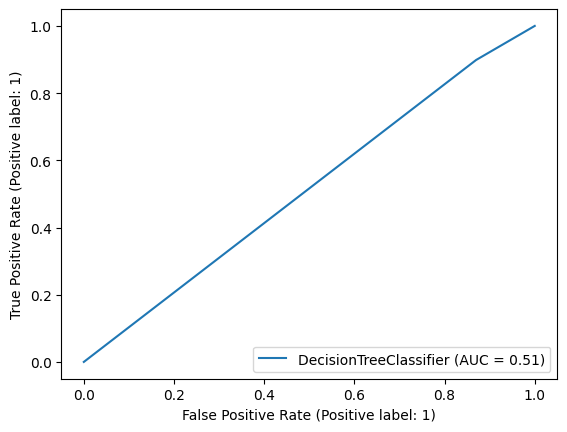

In [137]:
RocCurveDisplay.from_estimator(dtc, X_test,  y_test)